##### 1.4.10 Histograms in OpenCV 109

In [201]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

In [202]:
img = cv2.imread('1000_F_234860197_CH2F23rU2F7nbJ0Ng38k7MKvDhccHpnJ.jpg',0)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

In [203]:
print(hist)

[[3.7000e+01]
 [1.7000e+01]
 [3.2000e+01]
 [5.0000e+01]
 [4.6000e+01]
 [7.4000e+01]
 [7.1000e+01]
 [1.0200e+02]
 [1.0400e+02]
 [1.2600e+02]
 [1.3600e+02]
 [1.6700e+02]
 [1.7800e+02]
 [1.6400e+02]
 [2.0600e+02]
 [2.5700e+02]
 [2.8400e+02]
 [2.8300e+02]
 [2.9800e+02]
 [3.7500e+02]
 [3.8800e+02]
 [4.0000e+02]
 [4.6200e+02]
 [4.7900e+02]
 [4.8000e+02]
 [4.9300e+02]
 [5.5800e+02]
 [5.6500e+02]
 [5.6200e+02]
 [5.8700e+02]
 [6.3400e+02]
 [6.4400e+02]
 [6.7200e+02]
 [6.8500e+02]
 [7.0200e+02]
 [7.4500e+02]
 [7.7000e+02]
 [7.9500e+02]
 [8.1700e+02]
 [9.1600e+02]
 [9.1700e+02]
 [9.9600e+02]
 [9.6300e+02]
 [9.9800e+02]
 [1.0090e+03]
 [1.0420e+03]
 [1.1230e+03]
 [1.1030e+03]
 [1.1010e+03]
 [1.2520e+03]
 [1.1850e+03]
 [1.2910e+03]
 [1.3730e+03]
 [1.3710e+03]
 [1.3470e+03]
 [1.3520e+03]
 [1.3490e+03]
 [1.4740e+03]
 [1.4760e+03]
 [1.5500e+03]
 [1.4290e+03]
 [1.5730e+03]
 [1.5950e+03]
 [1.5990e+03]
 [1.5700e+03]
 [1.6320e+03]
 [1.6080e+03]
 [1.6470e+03]
 [1.6820e+03]
 [1.7210e+03]
 [1.7190e+03]
 [1.67

In [204]:
hist,bins = np.histogram(img.ravel(),256,[0,256])

In [205]:
hist.shape

(256,)

In [206]:
print(hist) # 밑에 히스토그램 값

[   37    17    32    50    46    74    71   102   104   126   136   167
   178   164   206   257   284   283   298   375   388   400   462   479
   480   493   558   565   562   587   634   644   672   685   702   745
   770   795   817   916   917   996   963   998  1009  1042  1123  1103
  1101  1252  1185  1291  1373  1371  1347  1352  1349  1474  1476  1550
  1429  1573  1595  1599  1570  1632  1608  1647  1682  1721  1719  1674
  1727  1746  1731  1723  1709  1672  1718  1751  1722  1794  1735  1750
  1744  1842  1798  1808  1799  1841  1853  1894  1906  1961  1938  1995
  1980  1986  2032  2164  2067  2103  2152  2175  2182  2226  2192  2306
  2370  2336  2373  2427  2501  2436  2580  2551  2646  2668  2725  2817
  2780  2859  2938  2940  2989  3053  3103  3110  3143  3227  3303  3362
  3432  3469  3478  3516  3540  3655  3521  3641  3645  3624  3682  3809
  3910  3804  3900  3881  3902  3950  4143  4033  4169  4153  3968  4074
  4176  4216  4215  4211  4203  4350  4385  4455  4

1. Using Matplotlib

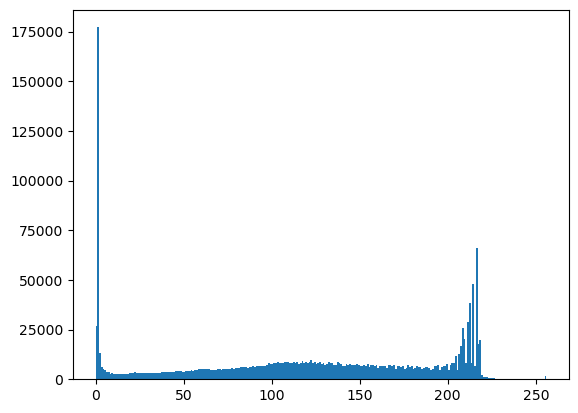

In [207]:
img = cv2.imread('OIP.jpeg',0)

plt.hist(img.ravel(),256,[0,256]); plt.show()

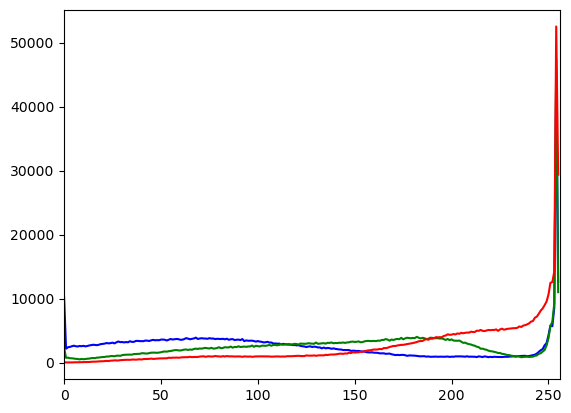

In [208]:
img = cv2.imread('1000_F_234860197_CH2F23rU2F7nbJ0Ng38k7MKvDhccHpnJ.jpg')   # 컬러로 읽기기
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

2. Using OpenCV

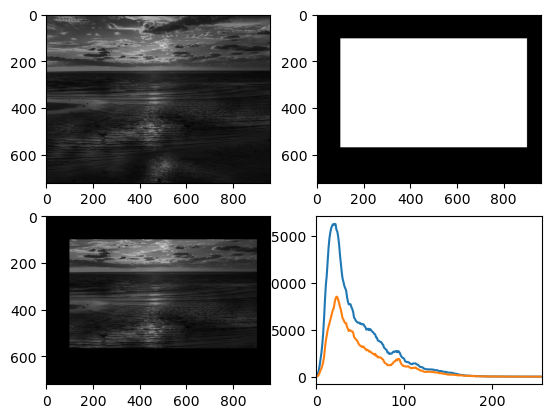

In [209]:
img = cv2.imread('sunset-5163192_960_720.jpg',0)
 
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)    # 특정부분만 하고 싶으면 마스크, 이미지 크기만큼 마스크
mask[100:567, 100:900] = 255    # 이미지 사이즈에 따라서 수정(이미지 사이즈에 100 빼기, 세로 가로)
masked_img = cv2.bitwise_and(img,img,mask = mask)
 
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
 
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')   
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

Histograms -2: Histogram Equalization

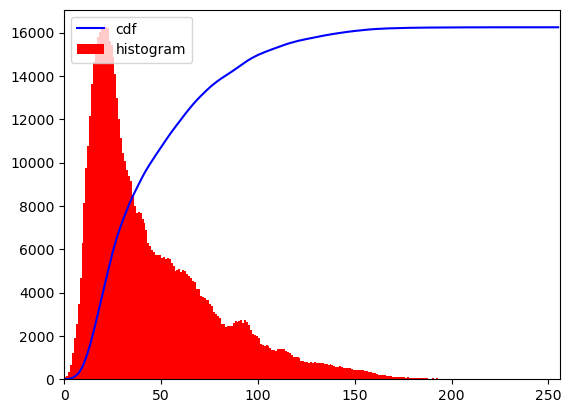

In [210]:
img = cv2.imread('sunset-5163192_960_720.jpg',0)
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [211]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m- cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [212]:
img2 = cdf[img]

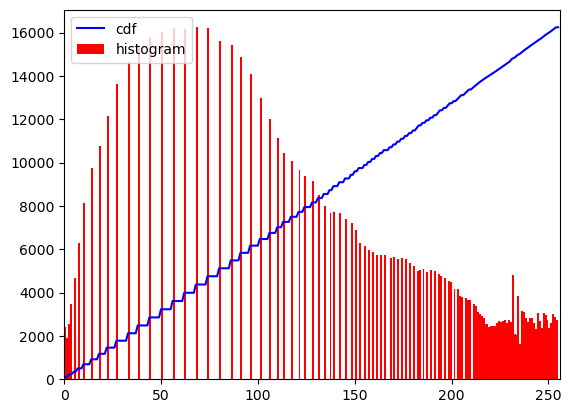

In [213]:
hist,bins = np.histogram(img2.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [214]:
img = cv2.imread('sunset-5163192_960_720.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)

True

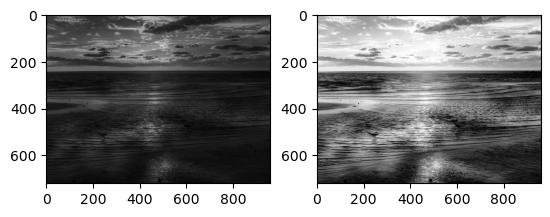

In [215]:
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(img2, 'gray')

plt.show()